<a href="https://colab.research.google.com/github/rohit1998-pixel/rohit1998-pixel/blob/main/CeO2_DPV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/CeO2_DPV.csv')
print(df.head())


       V        I2        I3        I4        I5        I6        I7  \
0 -1.200  0.000047  0.000045  0.000044  0.000043  0.000042  0.000042   
1 -1.197  0.000047  0.000045  0.000044  0.000043  0.000042  0.000042   
2 -1.194  0.000047  0.000045  0.000043  0.000042  0.000042  0.000042   
3 -1.191  0.000046  0.000045  0.000043  0.000042  0.000042  0.000041   
4 -1.188  0.000046  0.000045  0.000043  0.000042  0.000042  0.000041   

         I8        I9  
0  0.000041  0.000041  
1  0.000041  0.000041  
2  0.000041  0.000041  
3  0.000041  0.000041  
4  0.000041  0.000041  


In [83]:
Potential = df['V'].values
print(Potential)
I = ['I2','I3','I4','I5','I6','I7','I8','I9']  # example list of Y-axis column names
I = [df[I].values]
print(I)

[-1.2   -1.197 -1.194 -1.191 -1.188 -1.185 -1.182 -1.179 -1.176 -1.173
 -1.17  -1.167 -1.164 -1.161 -1.158 -1.155 -1.152 -1.149 -1.146 -1.143
 -1.14  -1.137 -1.134 -1.131 -1.128 -1.125 -1.122 -1.119 -1.116 -1.113
 -1.11  -1.107 -1.104 -1.101 -1.098 -1.095 -1.092 -1.089 -1.086 -1.083
 -1.08  -1.077 -1.074 -1.071 -1.068 -1.065 -1.062 -1.059 -1.056 -1.053
 -1.05  -1.047 -1.044 -1.041 -1.038 -1.035 -1.032 -1.029 -1.026 -1.023
 -1.02  -1.017 -1.014 -1.011 -1.008 -1.005 -1.002 -0.999 -0.996 -0.993
 -0.99  -0.987 -0.984 -0.981 -0.978 -0.975 -0.972 -0.969 -0.966 -0.963
 -0.96  -0.957 -0.954 -0.951 -0.948 -0.945 -0.942 -0.939 -0.936 -0.933
 -0.93  -0.927 -0.924 -0.921 -0.918 -0.915 -0.912 -0.909 -0.906 -0.903
 -0.9   -0.897 -0.894 -0.891 -0.888 -0.885 -0.882 -0.879 -0.876 -0.873
 -0.87  -0.867 -0.864 -0.861 -0.858 -0.855 -0.852 -0.849 -0.846 -0.843
 -0.84  -0.837 -0.834 -0.831 -0.828 -0.825 -0.822 -0.819 -0.816 -0.813
 -0.81  -0.807 -0.804 -0.801 -0.798 -0.795 -0.792 -0.789 -0.786 -0.783
 -0.78

In [84]:
def get_min_max1():
    return -0.9, -0.7

min_Potential_range1, max_Potential_range1 = get_min_max1()
Potential_filtered_range1 = Potential[(Potential >= min_Potential_range1) & (Potential <= max_Potential_range1)]
print("min_Potential_range1 =", min_Potential_range1)
print("max_Potential_range1 =", max_Potential_range1)

def get_min_max2():
    return -0.6, -0.4

min_Potential_range2, max_Potential_range2 = get_min_max2()
Potential_filtered_range1 = Potential[(Potential >= min_Potential_range2) & (Potential <= max_Potential_range2)]
print("min_Potential_range2 =", min_Potential_range2)
print("max_Potential_range2 =", max_Potential_range2)

def get_min_max3():
    return -0.2, -0.03

min_Potential_range3, max_Potential_range3 = get_min_max3()
Potential_filtered_range3 = Potential[(Potential >= min_Potential_range3) & (Potential <= max_Potential_range3)]
print("min_Potential_range3 =", min_Potential_range3)
print("max_Potential_range3 =", max_Potential_range3)

min_Potential_range1 = -0.9
max_Potential_range1 = -0.7
min_Potential_range2 = -0.6
max_Potential_range2 = -0.4
min_Potential_range3 = -0.2
max_Potential_range3 = -0.03


3.7.1
+-------------+-----------+-------------------------------------+------------------+-----------------------------+
|   Range No. |   Ion No. | Current due to peak                 |   Peak potential |   Current at that potential |
+=============+===========+=====================================+==================+=============================+
|           1 |         1 | Current due to Cd(II) ion at Conc 1 |           -0.798 |                    5.54e-05 |
+-------------+-----------+-------------------------------------+------------------+-----------------------------+
|           1 |         2 | Current due to Cd(II) ion at Conc 2 |           -0.786 |                    5.79e-05 |
+-------------+-----------+-------------------------------------+------------------+-----------------------------+
|           1 |         3 | Current due to Cd(II) ion at Conc 3 |           -0.783 |                    6.08e-05 |
+-------------+-----------+-------------------------------------+---------

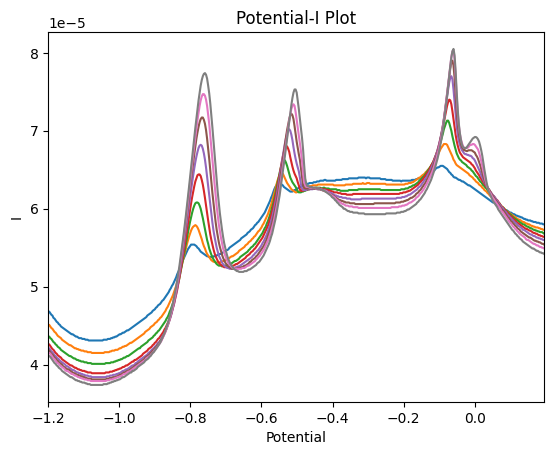

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)
from tabulate import tabulate

# Assuming X and Y are your data arrays
I_array = I[0] # Extract the NumPy array from the list

# Function to find max current and corresponding potential within a range
def find_max_in_range(potential_range, I_data):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    max_I_indices = np.argmax(I_in_range, axis=0)
    max_I_values = I_in_range[max_I_indices, np.arange(I_in_range.shape[1])]
    max_potential_values = Potential[indices_in_range][max_I_indices]
    return max_potential_values, max_I_values

# Potential ranges (using your defined functions)
potential_ranges = [
    get_min_max1(),
    get_min_max2(),
    get_min_max3()
]

def print_table():
    data = []
    for i, potential_range in enumerate(potential_ranges):
        max_potentials, max_currents = find_max_in_range(potential_range, I_array)
        for j in range(I_array.shape[1]):
            data.append([i+1, j+1, f"Current due to Cd(II) ion at Conc {j+1}",
                         max_potentials[j], max_currents[j]])
    headers = ["Range No.", "Ion No.", "Current due to peak", "Peak potential", "Current at that potential"]
    print(tabulate(data, headers, tablefmt="grid"))

print_table()

# Plot the data with x-axis range (you can adjust this for each range if needed)
plt.plot(Potential, I_array)
plt.xlim(Potential.min(), Potential.max())
plt.xlabel("Potential")
plt.ylabel("I")
plt.title("Potential-I Plot")
plt.show()

3.7.1
+-----------+--------------------------+-------------------+--------------------------+-------------------+--------------------------+-------------------+
|   Ion No. |   Range 1 Peak Potential |   Range 1 Current |   Range 2 Peak Potential |   Range 2 Current |   Range 3 Peak Potential |   Range 3 Current |
+===========+==========================+===================+==========================+===================+==========================+===================+
|         1 |                   -0.798 |          5.54e-05 |                   -0.423 |          6.37e-05 |                   -0.096 |          6.55e-05 |
+-----------+--------------------------+-------------------+--------------------------+-------------------+--------------------------+-------------------+
|         2 |                   -0.786 |          5.79e-05 |                   -0.546 |          6.45e-05 |                   -0.087 |          6.83e-05 |
+-----------+--------------------------+-------------------+----

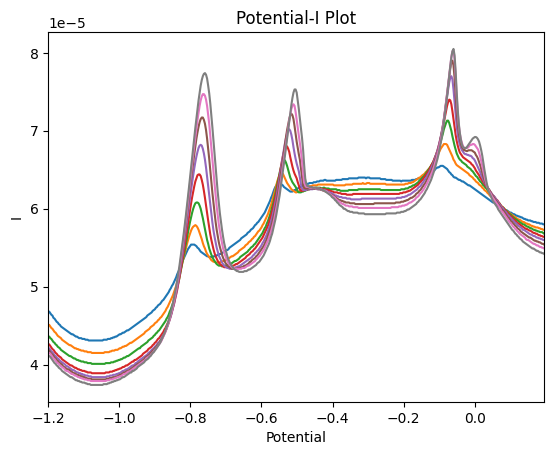

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)
from tabulate import tabulate

# Assuming X and Y are your data arrays
I_array = I[0] # Extract the NumPy array from the list

# Function to find max current and corresponding potential within a range
def find_max_in_range(potential_range, I_data):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    max_I_indices = np.argmax(I_in_range, axis=0)
    max_I_values = I_in_range[max_I_indices, np.arange(I_in_range.shape[1])]
    max_potential_values = Potential[indices_in_range][max_I_indices]
    return max_potential_values, max_I_values

# Potential ranges (using your defined functions)
potential_ranges = [
    get_min_max1(),
    get_min_max2(),
    get_min_max3()
]

def print_table():
    headers = ["Ion No."]
    data = []
    for i, potential_range in enumerate(potential_ranges):
        headers.append(f"Range {i+1} Peak Potential")
        headers.append(f"Range {i+1} Current")
        max_potentials, max_currents = find_max_in_range(potential_range, I_array)
        if i == 0:  # Initialize data list for the first range
            for j in range(I_array.shape[1]):
                data.append([j+1])
        for j in range(I_array.shape[1]):
            data[j].append(max_potentials[j])
            data[j].append(max_currents[j])

    print(tabulate(data, headers, tablefmt="grid"))

print_table()

# Plot the data with x-axis range (you can adjust this for each range if needed)
plt.plot(Potential, I_array)
plt.xlim(Potential.min(), Potential.max())
plt.xlabel("Potential")
plt.ylabel("I")
plt.title("Potential-I Plot")
plt.show()

3.7.1
+--------------+-------------------------+------------------+-------------------------+------------------+-------------------------+------------------+
|   Serial No. |   Cd(II) Peak Potential |   Cd(II) Current |   Pb(II) Peak Potential |   Pb(II) Current |   Cu(II) Peak Potential |   Cu(II) Current |
+==============+=========================+==================+=========================+==================+=========================+==================+
|            1 |                  -0.798 |         5.54e-05 |                  -0.423 |         6.37e-05 |                  -0.096 |         6.55e-05 |
+--------------+-------------------------+------------------+-------------------------+------------------+-------------------------+------------------+
|            2 |                  -0.786 |         5.79e-05 |                  -0.546 |         6.45e-05 |                  -0.087 |         6.83e-05 |
+--------------+-------------------------+------------------+---------------------

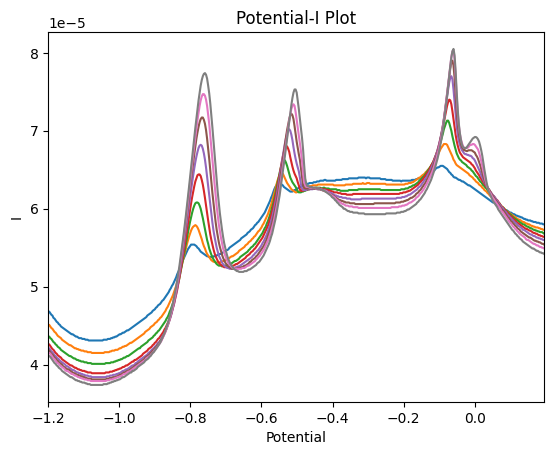

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)
from tabulate import tabulate

# Assuming X and Y are your data arrays
I_array = I[0] # Extract the NumPy array from the list

# Function to find max current and corresponding potential within a range
def find_max_in_range(potential_range, I_data):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    max_I_indices = np.argmax(I_in_range, axis=0)
    max_I_values = I_in_range[max_I_indices, np.arange(I_in_range.shape[1])]
    max_potential_values = Potential[indices_in_range][max_I_indices]
    return max_potential_values, max_I_values

# Potential ranges (using your defined functions)
potential_ranges = [
    get_min_max1(),
    get_min_max2(),
    get_min_max3()
]

# Ion labels for each range
ion_labels = ["Cd(II)", "Pb(II)", "Cu(II)"]

def print_table():
    headers = ["Serial No."]
    data = []
    for i, potential_range in enumerate(potential_ranges):
        headers.append(f"{ion_labels[i]} Peak Potential")
        headers.append(f"{ion_labels[i]} Current")
        max_potentials, max_currents = find_max_in_range(potential_range, I_array)
        if i == 0:  # Initialize data list for the first range
            for j in range(I_array.shape[1]):
                data.append([j+1])
        for j in range(I_array.shape[1]):
            data[j].append(max_potentials[j])
            data[j].append(max_currents[j])

    print(tabulate(data, headers, tablefmt="grid"))

print_table()

# Plot the data with x-axis range (you can adjust this for each range if needed)
plt.plot(Potential, I_array)
plt.xlim(Potential.min(), Potential.max())
plt.xlabel("Potential")
plt.ylabel("I")
plt.title("Potential-I Plot")
plt.show()